In [25]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


write abundance predictions as json files

In [26]:
from utils.helper_functions import * 

benchmark_dirs = ["Belgium", "Colorado", "Jakarta"]
ref_sets = [["Europe", "Global"],["North_America", "Global"], ["Asia", "Global"]]
start_dates = ["2020-01-01_till_2022-06-08", "2021-01-01_till_2022-06-08", "2021-06-01_till_2022-06-08", "2022-01-01_till_2022-06-08", "2022-06-01_till_2022-06-08"]
abundances = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]

for dir_name, ref_sts in zip(benchmark_dirs, ref_sets): 
    output_results_to_json_3_dirs(dir_name, "0.0", ref_sts, start_dates, abundances, "BA.4_sequence")

read abundance prediction

In [27]:
results = dict()

for dir_name in benchmark_dirs:
    results[dir_name] = dict()
    # load results
    with open("results_{}.json".format(dir_name)) as json_file:
        results[dir_name] = json.loads(json_file.read())

{'Belgium': {'Europe': {'2020-01-01_till_2022-06-08': {'1': 1.58, '2': 1.8, '3': 1.81, '4': 1.8, '5': 2.84, '6': 3.55, '7': 3.05, '8': 4.05, '9': 5.54, '10': 4.98, '20': 9.49, '30': 12.18, '40': 17.41, '50': 24.69, '60': 31.36, '70': 35.13, '80': 43.74, '90': 57.19, '100': 67.76}, '2021-01-01_till_2022-06-08': {'1': 1.66, '2': 1.87, '3': 1.88, '4': 1.8, '5': 2.84, '6': 3.5, '7': 3.0, '8': 4.02, '9': 5.39, '10': 4.8, '20': 9.68, '30': 12.3, '40': 17.62, '50': 25.23, '60': 31.82, '70': 35.32, '80': 44.09, '90': 57.66, '100': 68.91}, '2021-06-01_till_2022-06-08': {'1': 1.49, '2': 1.7, '3': 1.71, '4': 1.8, '5': 2.84, '6': 3.53, '7': 3.02, '8': 4.05, '9': 5.42, '10': 4.81, '20': 10.03, '30': 12.57, '40': 17.56, '50': 25.06, '60': 32.17, '70': 35.76, '80': 44.54, '90': 57.95, '100': 69.67}, '2022-01-01_till_2022-06-08': {'1': 1.57, '2': 1.79, '3': 1.97, '4': 1.81, '5': 3.02, '6': 3.61, '7': 3.13, '8': 4.12, '9': 5.3, '10': 4.72, '20': 9.97, '30': 12.41, '40': 17.64, '50': 24.99, '60': 32.23,

In [28]:
ref_sets_dict = dict()

for dir, ref_set_list in zip(benchmark_dirs, ref_sets):
    ref_sets_dict[dir] = ref_set_list

absolute_errors = calculate_absolute_errors_af(results, start_dates, abundances, ref_sets_dict, benchmark_dirs)

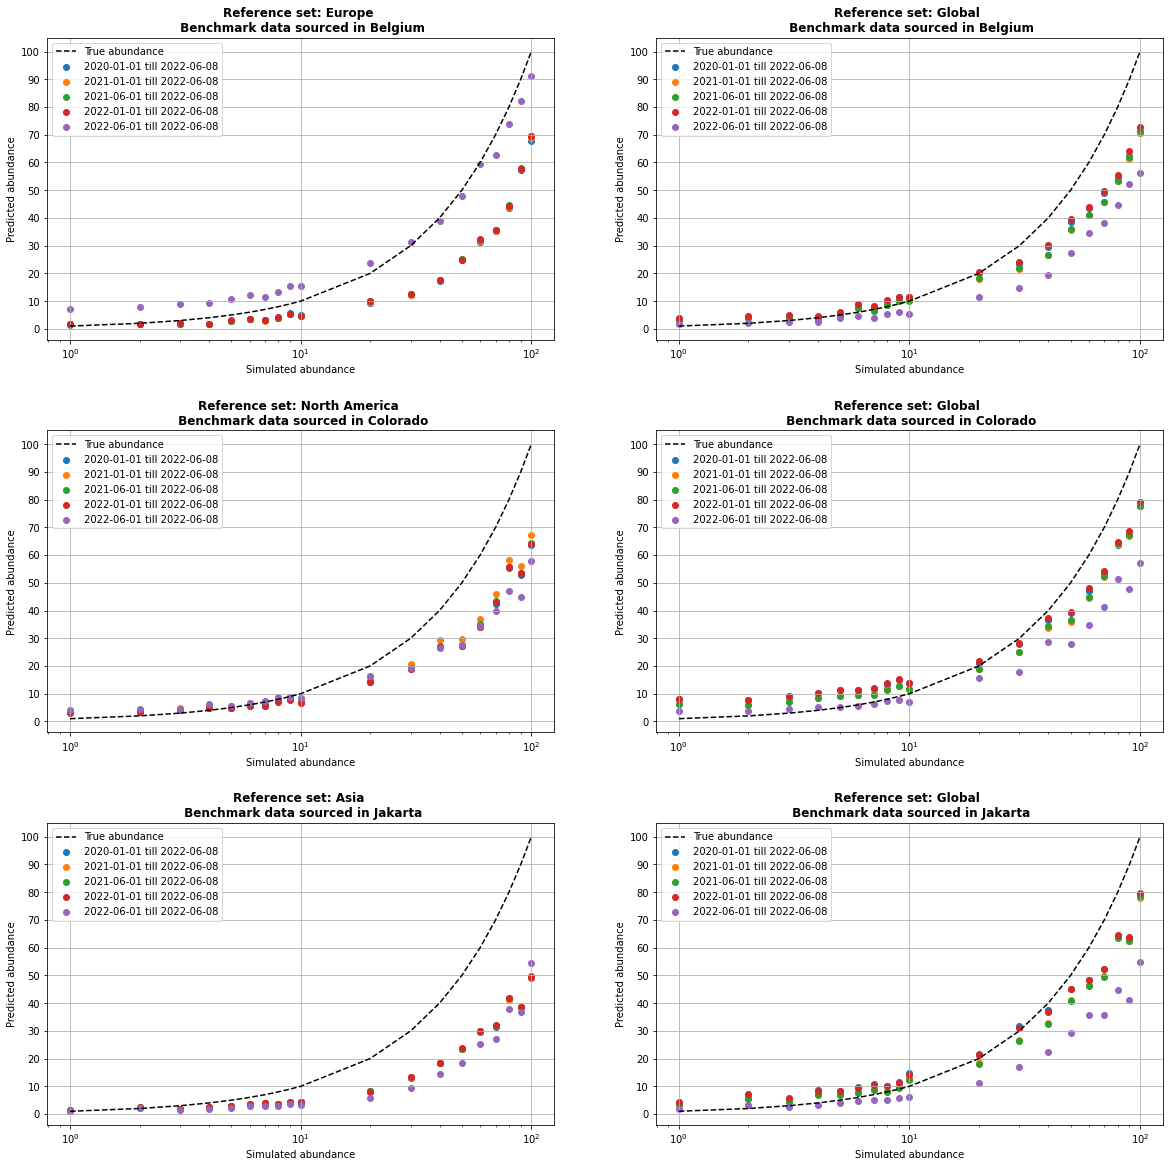

In [93]:
from utils.plotting_functions import *
if os.path.isdir("figures") != True:
    os.mkdir("figures")

ref_sets_per_dir = dict()
for dir, ref_set_l in zip(benchmark_dirs, ref_sets):
    ref_sets_per_dir[dir] = ref_set_l

plot_with_scatterplots(abundances, start_dates, results, ref_sets_per_dir)

